In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import preprocessing



In [2]:
genes = ["gene" + str(i) for i in range(1, 101)]

wt = ["WT_" + str(i) for i in range(1, 6)]
ko = ["KO_" + str(i) for i in range(1, 6)]

In [3]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
data.head()

,WT_1,WT_2,WT_3,WT_4,WT_5,KO_1,KO_2,KO_3,KO_4,KO_5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for gene in data.index:
    data.loc[gene, wt] = np.random.poisson(lam=np.random.randint(10, 1000), size=5)
    data.loc[gene, ko] = np.random.poisson(lam=np.random.randint(10, 1000), size=5)
data.head()    

,WT_1,WT_2,WT_3,WT_4,WT_5,KO_1,KO_2,KO_3,KO_4,KO_5
gene1,966,930,953,1010,985,12,13,10,13,12
gene2,287,294,247,282,269,256,278,261,253,254
gene3,305,283,265,273,297,119,101,108,109,112
gene4,559,573,586,571,604,268,246,263,238,272
gene5,925,899,919,915,927,742,727,775,756,759


In [6]:
data.shape

(100, 10)

In [7]:
scaled_data = preprocessing.scale(data.T)
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)


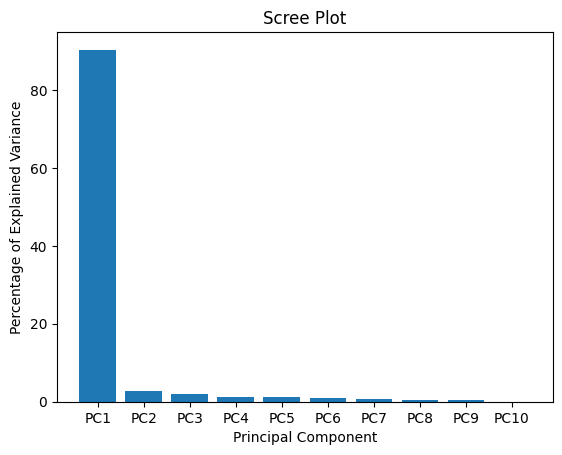

In [10]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show() 

In [11]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
WT_1,9.573167,1.456671,0.479790,-0.363457,-1.014567,-0.826728,-1.389448,0.845444,-0.567161,1.008991e-15
WT_2,9.133857,-1.625185,1.442200,-2.320312,0.680384,0.640171,0.359228,-0.494787,-0.456718,1.040591e-15
WT_3,8.963328,-0.820668,-2.090913,0.585257,0.571338,-1.708552,-0.011343,-1.018878,0.096431,-2.139782e-17
WT_4,10.124160,-0.962709,1.808594,1.952295,-0.554269,0.988364,-0.261465,-0.255850,0.752654,1.875301e-16
WT_5,9.675809,1.829603,-1.754881,0.087787,0.394593,0.860376,1.292904,0.899389,0.119911,1.045897e-16


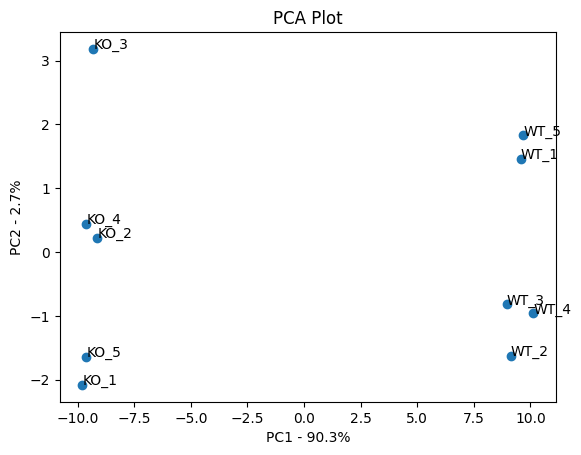

In [14]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Plot')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))


for sample in pca_df.index:
   plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [15]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene98    0.105236
gene1     0.105228
gene82   -0.105185
gene71   -0.105181
gene36    0.105168
gene83   -0.105156
gene51   -0.105150
gene21    0.105137
gene15    0.105116
gene54   -0.105109
dtype: float64
